In [97]:
import json
import logging
import os
import pandas as pd

with open('config.json', 'r') as f:
    config = json.load(f)

path = config['working_dir']

input_dir = os.path.join(path,'RESULTS_FINAL/MULTICLASS/naive100')
print('input_dir:',input_dir)
output_dir = os.path.join(path,'RESULTS_FINAL/MULTICLASS/naive100/results')
print('output_dir:',output_dir)

# os.makedirs(input_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

input_dir: /Users/francescamartinucci/tesi/RESULTS_FINAL/MULTICLASS/naive100
output_dir: /Users/francescamartinucci/tesi/RESULTS_FINAL/MULTICLASS/naive100/results


In [98]:
# Definizione delle variabili per i nomi dei file
path = ''
embedding_concat = 'naive100'
caso = '' #'_100'
bin_multi = 'multiclass'

# binario naive_100
# # Nomi dei file per Random Forest
# results_line_rf_file = f'{path}results_{caso}_forest_{bin_multi}_line_undirected.csv'
# results_node2vec_rf_file = f'{path}results_{caso}_forest_{bin_multi}_node2vec_undirected.csv'
# results_transE_rf_file = f'{path}results_{caso}_forest_{bin_multi}_transE_directed.csv'

# # Nomi dei file per Decision Tree
# results_line_dt_file = f'{path}results_{caso}_tree_{bin_multi}_line_undirected.csv'
# results_node2vec_dt_file = f'{path}results_{caso}_tree_{bin_multi}_node2vec_undirected.csv'
# results_transE_dt_file = f'{path}results_{caso}_tree_{bin_multi}_transE_directed.csv'

# Nomi dei file per Random Forest
results_line_rf_file = f'{embedding_concat}_line{caso}_forest_{bin_multi}_undirected.csv'
results_node2vec_rf_file = f'{embedding_concat}_node2vec{caso}_forest_{bin_multi}_undirected.csv'
results_transE_rf_file = f'{embedding_concat}_transe{caso}_forest_{bin_multi}_directed.csv'

# Nomi dei file per Decision Tree
results_line_dt_file = f'{embedding_concat}_line{caso}_tree_{bin_multi}_undirected.csv'
results_node2vec_dt_file = f'{embedding_concat}_node2vec{caso}_tree_{bin_multi}_undirected.csv'
results_transE_dt_file = f'{embedding_concat}_transe{caso}_tree_{bin_multi}_directed.csv'
print('results_line_rf_file:',results_line_rf_file)

# Nomi dei file per le tabelle intermedie
tmp_results_line_final_file = f'{path}tmp_results_{embedding_concat}{caso}_line_final.csv'
tmp_results_node2vec_final_file = f'{path}tmp_results_{embedding_concat}{caso}_node2vec_final.csv'
tmp_results_transe_final_file = f'{path}tmp_results_{embedding_concat}{caso}_transe_final.csv'
print('tmp_results_line_final_file:',tmp_results_line_final_file)

# Nomi dei file LaTeX
caso_titolo_tabella = 'a dimensione 100' # concatenato a BERT a dimensione 768
latex_table_line_file = f'{path}latex_table_{embedding_concat}{caso}_LINE.tex'
latex_table_node2vec_file = f'{path}latex_table_{embedding_concat}{caso}_Node2Vec.tex'
latex_table_transE_file = f'{path}latex_table_{embedding_concat}{caso}_TransE.tex'
print('latex_table_line_file:',latex_table_line_file)

results_line_rf_file: naive100_line_forest_multiclass_undirected.csv
tmp_results_line_final_file: tmp_results_naive100_line_final.csv
latex_table_line_file: latex_table_naive100_LINE.tex


In [99]:

# Leggi i file CSV per Random Forest
results_line_rf = pd.read_csv(os.path.join(input_dir,results_line_rf_file))
results_node2vec_rf = pd.read_csv(os.path.join(input_dir,results_node2vec_rf_file))
results_transE_rf = pd.read_csv(os.path.join(input_dir,results_transE_rf_file))

# Leggi i file CSV per Decision Tree
results_line_dt = pd.read_csv(os.path.join(input_dir,results_line_dt_file))
results_node2vec_dt = pd.read_csv(os.path.join(input_dir,results_node2vec_dt_file))
results_transE_dt = pd.read_csv(os.path.join(input_dir,results_transE_dt_file))

# Raggruppa i risultati e calcola media e deviazione standard
def group_and_aggregate(df, modello):
    df = df.groupby(["Source Type", "Destination Type"])[
        ["Positive balanced accuracy", "Negative balanced accuracy", "Mean balanced accuracy"]
    ].agg(["mean", "std"])
    df['Coppia di tipi'] = df.index.map(lambda x: f"{x[0]}-{x[1]}")
    df['Modello'] = modello
    df = df.rename(columns={'Positive balanced accuracy': 'BA Positiva',
                            'Negative balanced accuracy': 'BA Negativa',
                            'Mean balanced accuracy': 'BA Complessiva'})
    df = df.reset_index()
    return df[['Modello', 'Coppia di tipi', 'BA Positiva', 'BA Negativa', 'BA Complessiva']]

forest = "RandomForest"
tree = "DecisionTree"

# Random Forest
results_line_rf_agg = group_and_aggregate(results_line_rf, forest)
results_node2vec_rf_agg = group_and_aggregate(results_node2vec_rf, forest)
results_transE_rf_agg = group_and_aggregate(results_transE_rf, forest)

# Decision Tree
results_line_dt_agg = group_and_aggregate(results_line_dt, tree)
results_node2vec_dt_agg = group_and_aggregate(results_node2vec_dt, tree)
results_transE_dt_agg = group_and_aggregate(results_transE_dt, tree)

# Concatenazione di dt e rf
results_line_final = pd.concat([results_line_rf_agg, results_line_dt_agg])
results_node2vec_final = pd.concat([results_node2vec_rf_agg, results_node2vec_dt_agg])
results_transE_final = pd.concat([results_transE_rf_agg, results_transE_dt_agg])

results_line_final.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in results_line_final.columns.values]
results_node2vec_final.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in results_node2vec_final.columns.values]
results_transE_final.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in results_transE_final.columns.values]

# Salva i file finali
results_line_final.to_csv(os.path.join(output_dir,tmp_results_line_final_file), index=False)
results_node2vec_final.to_csv(os.path.join(output_dir,tmp_results_node2vec_final_file), index=False)
results_transE_final.to_csv(os.path.join(output_dir,tmp_results_transe_final_file), index=False)


# Tables

In [100]:

results_line_final = pd.read_csv(os.path.join(output_dir,tmp_results_line_final_file))
results_node2vec_final = pd.read_csv(os.path.join(output_dir,tmp_results_node2vec_final_file))
results_transE_final = pd.read_csv(os.path.join(output_dir,tmp_results_transe_final_file))

# Modifica la colonna Modello sostituendo RandomForest con RF e DecisionTree con DT
results_line_final['Modello'] = results_line_final['Modello'].replace({'RandomForest': 'RF', 'DecisionTree': 'DT'})
results_node2vec_final['Modello'] = results_node2vec_final['Modello'].replace({'RandomForest': 'RF', 'DecisionTree': 'DT'})
results_transE_final['Modello'] = results_transE_final['Modello'].replace({'RandomForest': 'RF', 'DecisionTree': 'DT'})

# print(results_line_final)

# Funzione per formattare i valori di media e deviazione standard
def format_value(mean, std):
    return f"{round(mean * 100, 2)}\%$\\pm${round(std * 100, 2)}\%" # arrotondamento valori a 2 cifre decimali

# Funzione per creare tabelle LaTeX
def create_latex_table(df, algoritmo, output_file):
    # Applica la formattazione ai valori di BA Positiva, BA Negativa e BA Complessiva
    df['BA Positiva'] = df.apply(lambda row: format_value(row['BA Positiva_mean'], row['BA Positiva_std'] if not pd.isnull(row['BA Positiva_std']) else 0), axis=1)
    df['BA Negativa'] = df.apply(lambda row: format_value(row['BA Negativa_mean'], row['BA Negativa_std'] if not pd.isnull(row['BA Negativa_std']) else 0), axis=1)
    df['BA Complessiva'] = df.apply(lambda row: format_value(row['BA Complessiva_mean'], row['BA Complessiva_std'] if not pd.isnull(row['BA Complessiva_std']) else 0), axis=1)

    # Seleziona solo le colonne necessarie per la tabella
    df = df[['Modello', 'Coppia di tipi', 'BA Positiva', 'BA Negativa', 'BA Complessiva']]

    if bin_multi == 'binary':
        bin_multi_title = 'binaria'
    else:
        bin_multi_title = 'multiclasse'

    # Converti il DataFrame in formato LaTeX
    latex_table = df.to_latex(index=False, escape=False, column_format='llrrr', 
                              caption=f'Risultati dei modelli basati su Decision Tree e Random Forest per la predizione {bin_multi_title} specifica degli archi ottenuti con {algoritmo} {caso_titolo_tabella}')

    # Aggiungi l'intestazione e il formato della tabella
    # latex_table = latex_table.replace('\\\\begin{tabular}', '\\\\begin{table}[!htbp]\\n\\\\caption{Risultati dei modelli basati su Decision Tree e Random Forest per la predizione specifica degli archi ottenuti con '+algoritmo+' multiclass dim 100 concatenato a 1536 openai.}\\n\\\\centering\\n\\\\begin{tabular}')
    # latex_table = latex_table.replace('\\\\end{tabular}', '\\\\end{tabular}\\n\\\\label{r11:tab:view0edgepred}\\n\\\\end{table}')

    # Salva la tabella in un file .tex
    with open(output_file, 'w') as f:
        f.write(latex_table)

    print(f"Tabella LaTeX per {algoritmo} generata e salvata in {output_file}")

create_latex_table(results_line_final, 'LINE', os.path.join(output_dir,latex_table_line_file))
create_latex_table(results_node2vec_final, 'Node2Vec', os.path.join(output_dir,latex_table_node2vec_file))
create_latex_table(results_transE_final, 'TransE', os.path.join(output_dir,latex_table_transE_file))

Tabella LaTeX per LINE generata e salvata in /Users/francescamartinucci/tesi/RESULTS_FINAL/MULTICLASS/naive100/results/latex_table_naive100_LINE.tex
Tabella LaTeX per Node2Vec generata e salvata in /Users/francescamartinucci/tesi/RESULTS_FINAL/MULTICLASS/naive100/results/latex_table_naive100_Node2Vec.tex
Tabella LaTeX per TransE generata e salvata in /Users/francescamartinucci/tesi/RESULTS_FINAL/MULTICLASS/naive100/results/latex_table_naive100_TransE.tex


<>:14: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\%'
/var/folders/2w/jr_qm84s2c12z0n5l03jhp740000gn/T/ipykernel_31978/2923110975.py:14: SyntaxWarning: invalid escape sequence '\%'
  return f"{round(mean * 100, 2)}\%$\\pm${round(std * 100, 2)}\%" # arrotondamento valori a 2 cifre decimali
/var/folders/2w/jr_qm84s2c12z0n5l03jhp740000gn/T/ipykernel_31978/2923110975.py:14: SyntaxWarning: invalid escape sequence '\%'
  return f"{round(mean * 100, 2)}\%$\\pm${round(std * 100, 2)}\%" # arrotondamento valori a 2 cifre decimali


# Histogram

In [101]:
import pandas as pd

results_line_final = pd.read_csv(os.path.join(output_dir,tmp_results_line_final_file), index_col='Coppia di tipi')
results_node2vec_final = pd.read_csv(os.path.join(output_dir,tmp_results_node2vec_final_file), index_col='Coppia di tipi')
results_transE_final = pd.read_csv(os.path.join(output_dir,tmp_results_transe_final_file), index_col='Coppia di tipi')
results_line_final

,Modello,BA Positiva_mean,BA Positiva_std,BA Negativa_mean,BA Negativa_std,BA Complessiva_mean,BA Complessiva_std
Coppia di tipi,,,,,,,
Gene-Disease,RandomForest,0.882397,0.002892,0.899451,0.001379,0.890924,0.001714
Gene-Phenotype,RandomForest,0.760985,0.003085,0.841606,0.002472,0.801295,0.001611
miRNA-Disease,RandomForest,0.132135,0.001139,0.858157,0.003020,0.495146,0.001767
miRNA-Gene,RandomForest,0.263027,0.041130,0.608533,0.012840,0.435780,0.014561
miRNA-Phenotype,RandomForest,0.134851,0.002134,0.862633,0.003255,0.498742,0.001838
Gene-Disease,DecisionTree,0.843290,0.003317,0.821329,0.002115,0.832309,0.002168
Gene-Phenotype,DecisionTree,0.721915,0.004192,0.730761,0.005150,0.726338,0.003207
miRNA-Disease,DecisionTree,0.146449,0.005977,0.709783,0.004342,0.428116,0.004719
miRNA-Gene,DecisionTree,0.260357,0.043174,0.606151,0.003603,0.433254,0.020876


In [ ]:

# Estrai i valori di BA Complessiva per Random Forest
mean_line_rf = results_line_final.loc[results_line_final['Modello'] == 'RandomForest']['BA Complessiva_mean']
mean_node2vec_rf = results_node2vec_final.loc[results_node2vec_final['Modello'] == 'RandomForest']['BA Complessiva_mean']
mean_transE_rf = results_transE_final.loc[results_transE_final['Modello'] == 'RandomForest']['BA Complessiva_mean']

# # Estrai i valori di BA Complessiva per Decision Tree
mean_line_dt = results_line_final.loc[results_line_final['Modello'] == 'DecisionTree']['BA Complessiva_mean']
mean_node2vec_dt = results_node2vec_final.loc[results_node2vec_final['Modello'] == 'DecisionTree']['BA Complessiva_mean']
mean_transE_dt = results_transE_final.loc[results_transE_final['Modello'] == 'DecisionTree']['BA Complessiva_mean']

mean_transE_rf

Coppia di tipi
Gene-Disease       0.755277
Gene-Phenotype     0.645419
miRNA-Disease      0.840124
miRNA-Gene         0.648685
miRNA-Phenotype    0.831389
Name: BA Complessiva_mean, dtype: float64

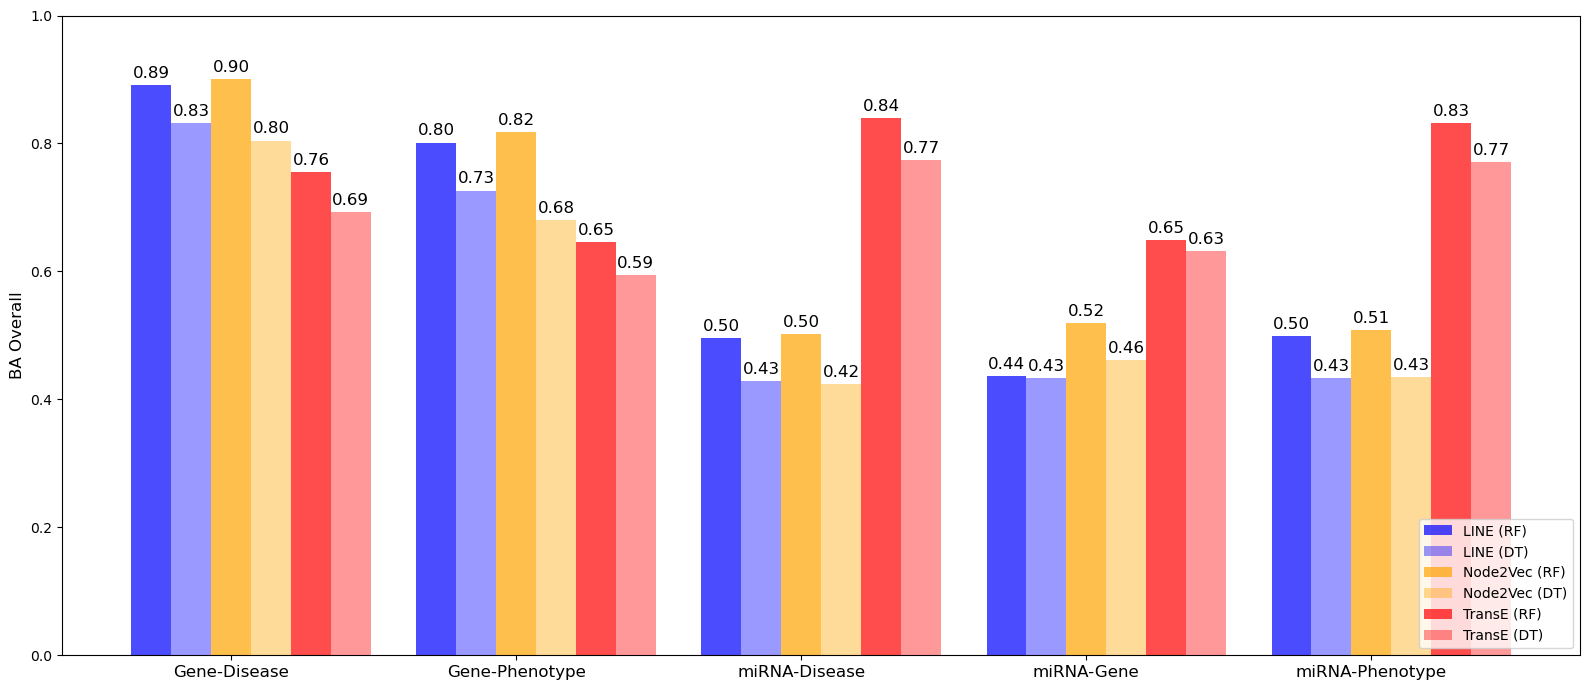

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Crea gli istogrammi
labels = mean_line_rf.index
x = np.arange(len(labels))
width = 0.42  # Larghezza per ogni barra

fig, ax = plt.subplots(figsize=(16, 7))

# Posizioni delle barre
positions = np.arange(len(labels)) * 3  # Aumenta lo spazio tra i gruppi di barre

# Barre per LINE (RF e DT)
rects_line_rf = ax.bar(positions - width, mean_line_rf, width, label='LINE (RF)', color='blue', alpha=0.7)
rects_line_dt = ax.bar(positions, mean_line_dt, width, label='LINE (DT)', color='blue', alpha=0.4)

# Barre per Node2Vec (RF e DT)
rects_node2vec_rf = ax.bar(positions + width, mean_node2vec_rf, width, label='Node2Vec (RF)', color='orange', alpha=0.7)
rects_node2vec_dt = ax.bar(positions + 2*width, mean_node2vec_dt, width, label='Node2Vec (DT)', color='orange', alpha=0.4)

# Barre per TransE (RF e DT)
rects_transE_rf = ax.bar(positions + 3*width, mean_transE_rf, width, label='TransE (RF)', color='red', alpha=0.7)
rects_transE_dt = ax.bar(positions + 4*width, mean_transE_dt, width, label='TransE (DT)', color='red', alpha=0.4)

# Aggiungi etichette, titolo e legenda
# ax.set_xlabel('Coppia di tipi', fontsize=12)
ax.set_ylabel('BA Overall', fontsize=12)
# ax.set_title('BA Complessiva by Model and Type (Random Forest vs Decision Tree) Multiclass (grape100-openai1536)', fontsize=14)
ax.set_xticks(positions + width)  # Centra le etichette tra i gruppi di barre
ax.set_xticklabels(labels, fontsize=12) #rotation=0, ha='right', 
ax.legend(loc='lower right', fontsize=10)

# Mostra i valori numerici sopra le barre
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

# Etichette per tutte le barre
autolabel(rects_line_rf)
autolabel(rects_line_dt)
autolabel(rects_node2vec_rf)
autolabel(rects_node2vec_dt)
autolabel(rects_transE_rf)
autolabel(rects_transE_dt)

# Mantieni l'asse y tra 0 e 1
ax.set_ylim(0, 1)

# Mostra il grafico
plt.tight_layout()
plt.show()

# Salva il grafico come immagine
fig.savefig(os.path.join(output_dir,f'histogram_{embedding_concat}{caso}_{bin_multi}.png')) 
plt.close()

In [ ]:
# lp = ['BINARY', 'MULTICLASS']
# classificatori = ['forest', 'tree']
# embedders = {'line': 'undirected', 'node2vec': 'undirected', 'transe': 'directed'}
# model_dict = {
#     'bert': ['BERT','_100'],
#     'naive100': ['naive100',''],
#     'text-embedding-3-small': ['openai','_100']
# }
# concat_number = ['100', '0', '100'] # solo i concatenati (bert e openai) hanno 100 dopo il nome

# for l in lp:
#     for modello, r in model_dict.items():
#         for classificatore in classificatori:
#             for embedder, direction in embedders.items():
#                 prefisso = r[0]
#                 val_concat = r[1]
#                 file_name = f"{os.path.join(input_dir,l, modello)}/{prefisso}_{embedder}{val_concat}_{classificatore}_{l.lower()}_{direction}.csv"
#                 print(file_name)